# Problem Set 2

## Question 4

Do Exercise 26.12 in Hansen (2022).

In [74]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Import data
data = pd.read_stata("https://www.ssc.wisc.edu/~bhansen/econometrics/cps09mar.dta")
# Create new variable 'marital_new' to group marital status 1,2,3,4 (married and widowed) together, with value 1
data['marital_new']= data['marital'].copy()
data.loc[data['marital_new']<5, 'marital_new']= 1

In [75]:
# MEN SUBSET
data_men= data[data.female == 0]
## Relevant variables for regression
X_men = data_men.drop(['marital','marital_new', 'female', 'hisp', 'education', 'earnings', 'hours', 'week', 'union', 'uncov', 'region', 'race'], axis=1)
Y_men = data_men['marital_new']

# Model regression with Statsmodel MNLogit
## MEN
logit_model_m=sm.MNLogit(Y_men,sm.add_constant(X_men))
result_m=logit_model_m.fit(method='newton',full_output=1)
print(result_m.summary())

Optimization terminated successfully.
         Current function value: 0.711288
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:            marital_new   No. Observations:                29140
Model:                        MNLogit   Df Residuals:                    29134
Method:                           MLE   Df Model:                            3
Date:                Fri, 07 Oct 2022   Pseudo R-squ.:                  0.1186
Time:                        17:02:26   Log-Likelihood:                -20727.
converged:                       True   LL-Null:                       -23515.
Covariance Type:            nonrobust   LLR p-value:                     0.000
marital_new=5       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.1264      0.096    -32.471      0.000      -3.315      -2.938
age               0.

In [76]:
# WOMEN SUBSET
data_women= data[data.female == 1]
## Relevant variables for regression
X_women = data_women.drop(['marital','marital_new', 'female', 'hisp', 'education', 'earnings', 'hours', 'week', 'union', 'uncov', 'region', 'race'], axis=1)
Y_women = data_women['marital_new']

# Model regression with Statsmodel MNLogit
## WOMEN
logit_model_w=sm.MNLogit(Y_women,sm.add_constant(X_women))
result_w=logit_model_w.fit(method='newton',full_output=1)
print(result_w.summary())

Optimization terminated successfully.
         Current function value: 0.930872
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:            marital_new   No. Observations:                21602
Model:                        MNLogit   Df Residuals:                    21596
Method:                           MLE   Df Model:                            3
Date:                Fri, 07 Oct 2022   Pseudo R-squ.:                 0.07776
Time:                        17:02:31   Log-Likelihood:                -20109.
converged:                       True   LL-Null:                       -21804.
Covariance Type:            nonrobust   LLR p-value:                     0.000
marital_new=5       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.6759      0.088    -30.363      0.000      -2.849      -2.503
age               0.

Text(0.5, 1.0, 'Probability of Marital Status Given Age for Men')

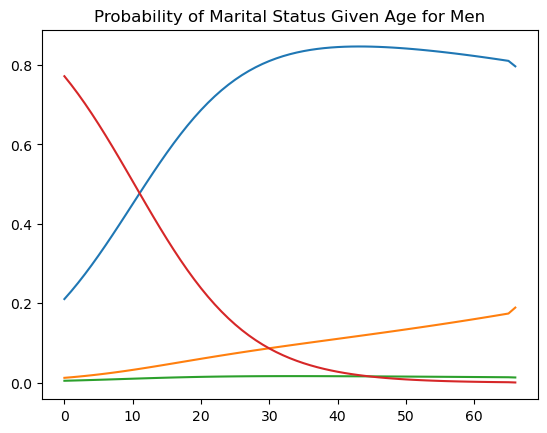

In [78]:
# Plot the graphs 
age_unique = np.sort(data.age.unique()).reshape(-1,1)

## MEN
proba_m = logit_model_m.predict(result_m.params, exog= sm.tools.add_constant(age_unique), linear= False)

plt.plot(proba_m)
plt.title("Probability of Marital Status Given Age for Men")

Text(0.5, 1.0, 'Probability of Marital Status Given Age for Women')

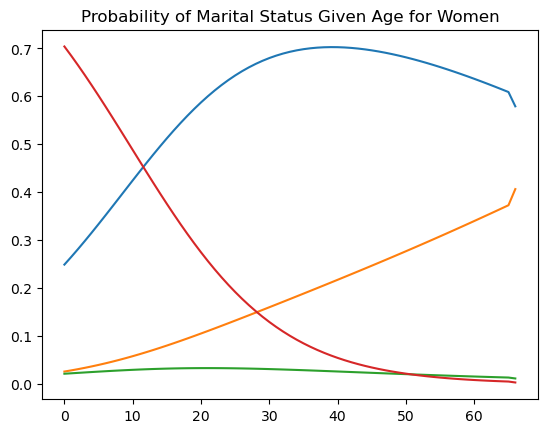

In [79]:
## WOMEN
proba_w = logit_model_w.predict(result_w.params, exog= sm.tools.add_constant(age_unique), linear= False)

plt.plot(proba_w)
plt.title("Probability of Marital Status Given Age for Women")